In [55]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [59]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [61]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [62]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


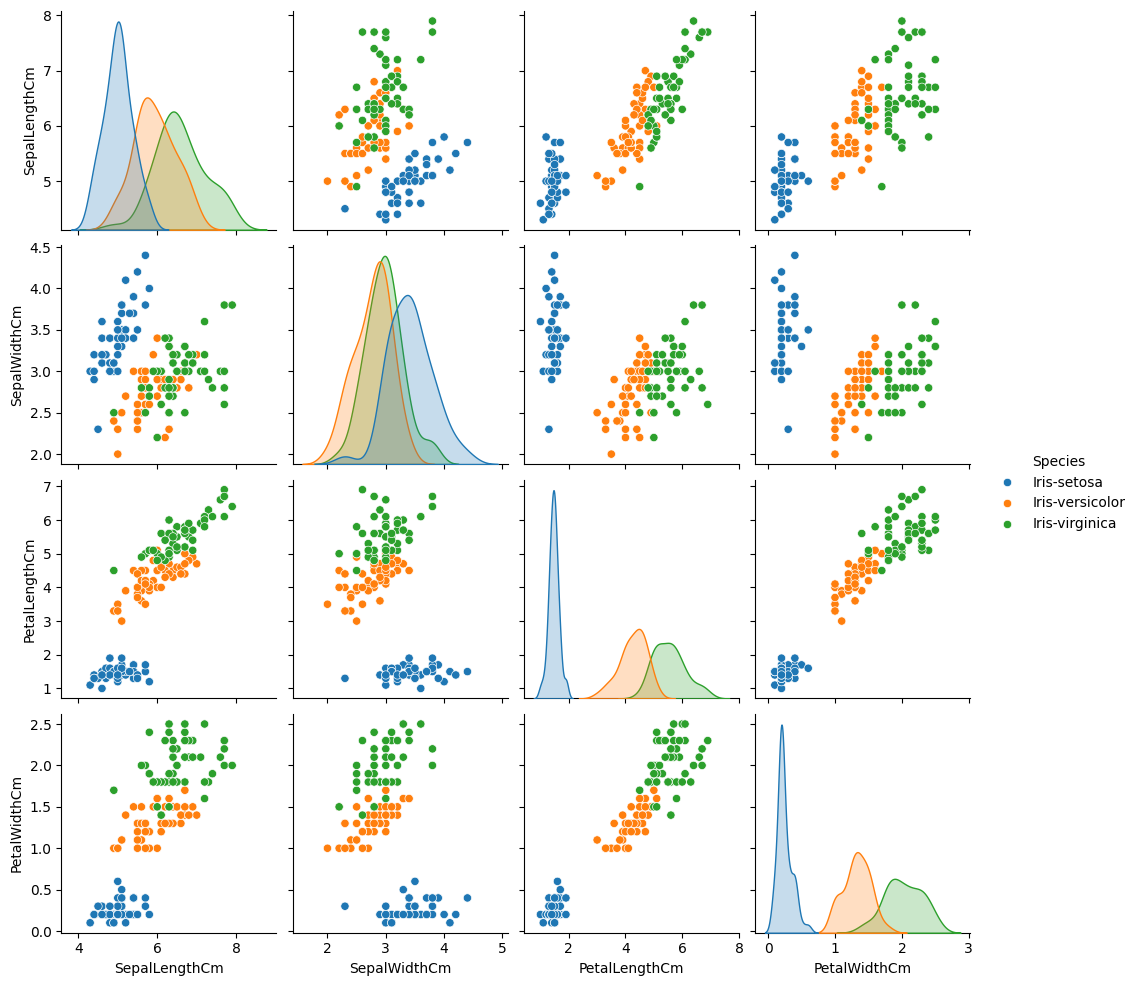

In [63]:
# plot fig
sns.pairplot(df, hue = 'Species')
plt.show()

In [64]:
cat_columns = ['Species']
df = pd.get_dummies(df, columns = cat_columns , drop_first=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,False,False
1,4.9,3.0,1.4,0.2,False,False
2,4.7,3.2,1.3,0.2,False,False
3,4.6,3.1,1.5,0.2,False,False
4,5.0,3.6,1.4,0.2,False,False


In [65]:
X = df.drop(columns=['Species_Iris-versicolor', 'Species_Iris-virginica'])

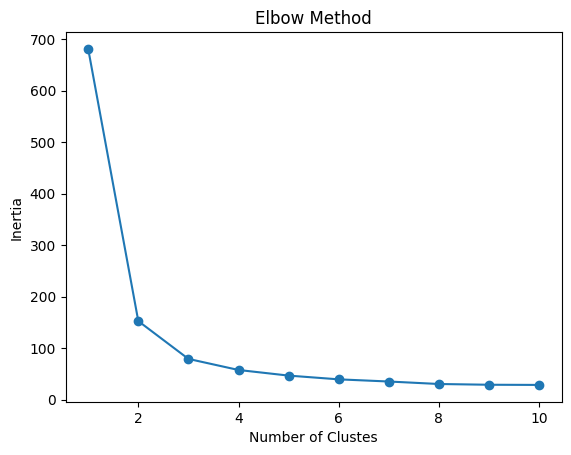

In [66]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clustes')
plt.ylabel('Inertia')
plt.show()

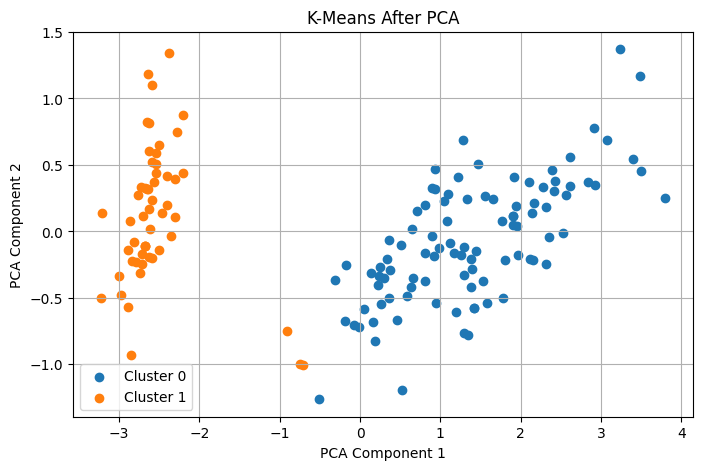

In [67]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(8,5))
for cluster in range(2):
    plt.scatter(
        X_pca[clusters_pca == cluster, 0],
        X_pca[clusters_pca == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.title("K-Means After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

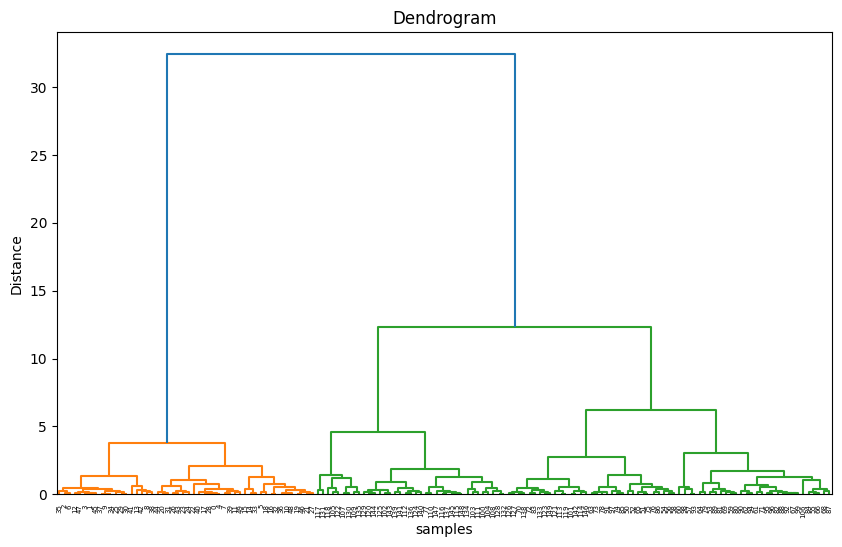

In [70]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Dendrogram")
plt.xlabel('samples')
plt.ylabel('Distance')
plt.show()

In [78]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean')
hc_labels = hc.fit_predict(X_pca)

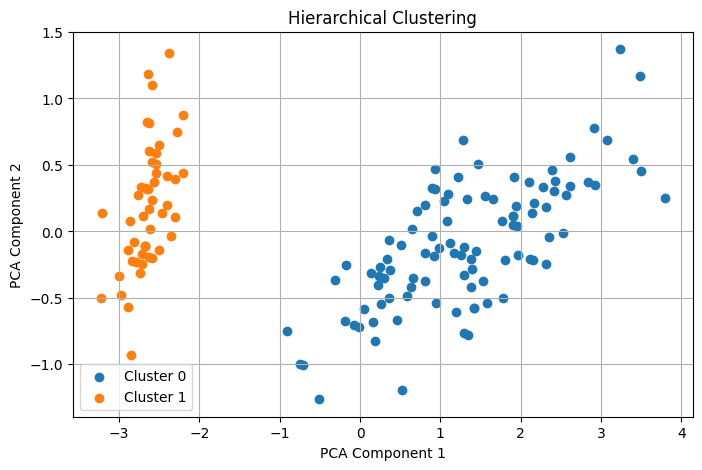

In [79]:
plt.figure(figsize=(8,5))
for cluster in range(2):
    plt.scatter(X_pca[hc_labels == cluster, 0],
                X_pca[hc_labels == cluster, 1],
                label = f'Cluster {cluster}'
               )
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
### Explanation
# Fig plots, are made by using combinations, each by choosing one element at x axis and another at y axis
# to plot the data on the graph we used pca becuse we cant project the the multifeature data on the 3d axis
# And using elbow method we found out the number of clusters required
# Same with Hierarchical Clustering, but clusters are choosen based on the distance

In [ ]:
# Gene Seperation,coustmer Segregation, AD recomendation, plant classification etc